In [26]:
import sys

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline


In [2]:
languages_data_folder = 'paragraphs/'
dataset = load_files(languages_data_folder)

In [4]:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.5)

In [19]:
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(1,3))
perceptron = Perceptron()
clf = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', perceptron)
])

In [20]:
clf.fit(docs_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char_wb', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 Perceptron(alpha=0.0001, class_weight=None,
                            early_stopping=False, eta0=1.0, fit_interce

In [21]:
def print_report(pipe):
    report = metrics.classification_report(y_test, y_pred,
        target_names=dataset.target_names)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

In [22]:
y_pred = clf.predict(docs_test)

In [23]:
print_report(clf)

              precision    recall  f1-score   support

          ar       1.00      1.00      1.00        14
          de       0.97      1.00      0.99        70
          en       0.99      1.00      0.99        80
          es       1.00      0.98      0.99        56
          fr       1.00      1.00      1.00        63
          it       1.00      1.00      1.00        41
          ja       1.00      1.00      1.00        30
          nl       1.00      0.92      0.96        25
          pl       1.00      1.00      1.00        18
          pt       1.00      1.00      1.00        65
          ru       1.00      1.00      1.00        33

    accuracy                           0.99       495
   macro avg       1.00      0.99      0.99       495
weighted avg       0.99      0.99      0.99       495

accuracy: 0.994


In [24]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0  0  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0  0  0  0]
 [ 0  0 80  0  0  0  0  0  0  0  0]
 [ 0  0  1 55  0  0  0  0  0  0  0]
 [ 0  0  0  0 63  0  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0]
 [ 0  2  0  0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0  0 65  0]
 [ 0  0  0  0  0  0  0  0  0  0 33]]


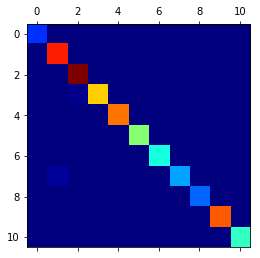

In [27]:
import matplotlib.pyplot as plt
plt.matshow(cm, cmap=plt.cm.jet)
plt.show()

In [28]:
# Predict the result on some short new sentences:
sentences = [
    'This is a language detection test.',
    'Ceci est un test de d\xe9tection de la langue.',
    'Dies ist ein Test, um die Sprache zu erkennen.',
]
predicted = clf.predict(sentences)

for s, p in zip(sentences, predicted):
    print('The language of "%s" is "%s"' % (s, dataset.target_names[p]))

The language of "This is a language detection test." is "en"
The language of "Ceci est un test de détection de la langue." is "fr"
The language of "Dies ist ein Test, um die Sprache zu erkennen." is "de"


In [30]:
import eli5

In [32]:
eli5.show_weights(clf, top=10, target_names=dataset.target_names)

In [34]:
eli5.show_prediction(perceptron, dataset.data[0], vec=vectorizer,
                     target_names=dataset.target_names)

/home/youneszadi/LearningPath/handsOnML/mlenv/lib/python3.6/site-packages/eli5/formatters/text_helpers.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  weight /= (end - start)
